## Parte 1: Predicción del valor de mercado

*a) Recta de regresión para predecir el valor de mercado de un jugador a partir de la característica más relevante (a la que se destinará mayor proporción del presupuesto), respaldada por:*

Consideramos como caracteristica mas relevante al overall, que es la puntuacion general del jugador y por lo tanto, que tan buena figurita es.
A partir de esta muestra de datos graficamos la relacion entre el valor de mercado(y) y el overall(x).
No sin antes normalizar los valores de mercado, es decir, establecerlos en un rango que sea mas legible y entendible a la hora de graficar o ver estadisticas.
Tambien consideramos no poner aquellos valores con overall muy bajo ya que representan una escasa cantidad de figuritas que no aportan relevancia al analisis.

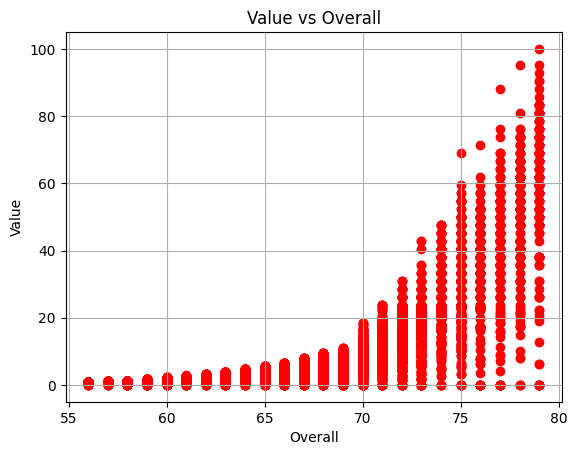

In [17]:
from numpy import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Cargar el dataset
df = pd.read_csv("code/dataset/FIFA21.csv")

relevant_feature = "overall"
# Seleccionar las columnas de interés
df = df[["long_name", "value_eur", relevant_feature]].dropna()

# Eliminar todos los valores cuyo overall sea menor a 60 o mayor a 80 ya que pueden ser outliers(valores atipicos)
df = df[df[relevant_feature] > 55]
df = df[df[relevant_feature] < 80]

# Normalizar la columna 'value_eur' a un rango de 0 a 100
df['value_eur_normalized'] = 100 * (df['value_eur'] - df['value_eur'].min()) / (df['value_eur'].max() - df['value_eur'].min())

# Definir las variables
x = df[relevant_feature]
y = df['value_eur_normalized']

# Grafico con los datos obtenidos
plt.scatter(x, y, color='red')
plt.title('Value vs Overall')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.grid()
plt.show()

De esta forma ya podemos ver que tiene cierta relacion entre el overall y el valor de mercado ya que al aumentar uno se puede ver el aumento del otro asi que podemos avanzar con la recta estimativa de valores.

Para esto sacamos todos los valores necesarios para obtener una ecuacion de la recta tal que 
### Y = β1X + β0 + ε

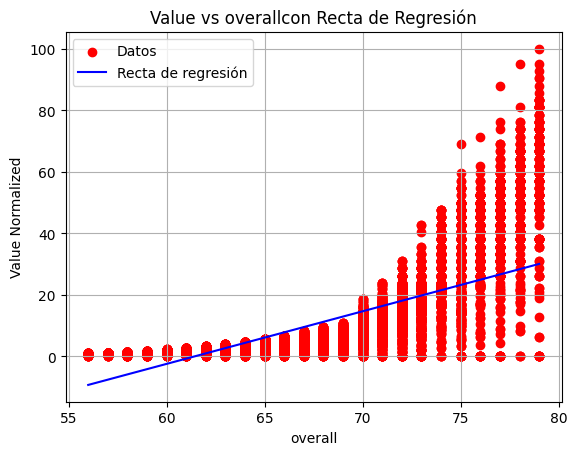

In [18]:
# Recta de regresión para predecir el valor de mercado
# de un jugador a partir de la característica más relevante

# Calcular la sumatoria de las variables x e y
x_sum = x.sum()
y_sum = y.sum()

# Calcular la media de las columnas 2 y 3
x_avg = x.mean()
y_avg = y.mean()

# Calcular la sumatoria de los cuadrados de las variables x e y
x_sq_sum = (x ** 2).sum()
y_sq_sum = (y ** 2).sum()

# Sigma al cuadrado de x e y (varianza corregida)
x_var = x_sq_sum / len(x) - (x_sum ** 2) / len(x)**2
y_var = y_sq_sum / len(y) - (y_sum ** 2) / len(y)**2

# Sigma de xy
xy_dev = ((x * y).sum() / len(x)) - (x_avg * y_avg)

# Coeficientes de la recta de regresión Pendiente y Ordenada
b1 = xy_dev / x_var
b0 = y_avg - b1 * x_avg

# Estimación de mínimos cuadrados
Sxy = (x * y).sum() - ((x.sum() * y.sum()) / len(x))
Sxx = x_sq_sum - ((x.sum() ** 2) / len(x))
Syy = y_sq_sum - ((y.sum() ** 2) / len(y))

# Coeficientes de la recta de regresión Pendiente y Ordenada
b1_hat = Sxy / Sxx
b0_hat = y_avg - b1_hat * x_avg

y_hat = b0_hat + b1_hat * x

# Dibujar recta a partir de y_hat
plt.scatter(x, y, color='red', label='Datos')
plt.plot(x, y_hat, color='blue', label='Recta de regresión')
plt.title('Value vs ' + relevant_feature + 'con Recta de Regresión')
plt.xlabel(relevant_feature)
plt.ylabel('Value Normalized')
plt.legend()
plt.grid()
plt.show()

*i) Prueba de significancia de regresión, coeficiente de determinación (R²) y correlación lineal
(r)*

In [19]:
SSr = Syy - (b1_hat * Sxy)

# Calculo de la varianza
sigma_hat_sqrd = SSr / (len(x) - 2)

# Calculo del coeficiente de determinación
R2 = 1 - SSr/Syy

# Coeficiente de Correlación Lineal
r = Sxy / sqrt(Sxx * Syy)

# Imprimir los resultados
print("SSr: " + str(SSr))
print("Varianza: " + str(sigma_hat_sqrd))
print("Coeficiente de determinacion: " + str(R2 * 100) + "%")
print("Coeficiente de correlación: " + str(r) + "\n")

# Prueba de significancia
# Se calcula el error estandar de la pendiente
dflen = len(x) - 2

sse = ((y - y_hat) ** 2).sum()
error_estandar_pendiente = sqrt(sse / (dflen * Sxx))

# Test de Hipótesis
t = b1_hat / error_estandar_pendiente

print("Error estandar de la pendiente: " + str(error_estandar_pendiente))
print("Test de Hipótesis: " + str(t))

SSr: 1150032.4691282844
Varianza: 67.77255401781392
Coeficiente de determinacion: 56.869199037800186%
Coeficiente de correlación: 0.754116695464304

Error estandar de la pendiente: 0.011440605711295652
Test de Hipótesis: 149.57978993033822


Sobre el coeficiente de determinacion este porcentaje indica que el modelo explica el 56.86% de la variabilidad total en los datos. Si bien no es perfecto (100%), sigue siendo un buen indicador de que el modelo tiene una capacidad razonable para predecir el comportamiento de los datos.

Por otra parte el coeficiente de correlacion refleja la fuerza y la dirección de la relación entre las variables independientes y dependientes. Un valor de 0.7541 indica una fuerte correlación positiva, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.

Error estandar de la pendiente: 0.0114469301837671184 , este valor indica la precisión de la pendiente estimada. Un error estándar bajo sugiere que la pendiente está bien estimada y es confiable.

Test de hipotesis; 149.5797 Este valor es un estadístico t que evalúa si la pendiente es significativamente diferente de 0. Un valor tan alto indica que la pendiente es significativamente distinta de 0, lo que respalda la existencia de una relación significativa entre las variables.

*ii) Inferencias sobre los parámetros de la recta, estimando las
fluctuaciones con una confianza del 95%.
Conclusión del test*


In [20]:

# Valor de P
p = 2 * (1 - stats.t.cdf(abs(t), dflen))

if p < 0.05:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

Se rechaza la hipótesis nula


Esto significa que la pendiente es significativamente diferente de 0, y por lo tanto, existe una relación significativa entre las variables. Si el valor p fuese mayor o igual a 0.05, no se puede rechazar la hipótesis nula, lo que implica que la pendiente podría no ser significativa.

*iii) La proporción de veces que el valor de mercado supera la incertidumbre de predicción
comparada con la respuesta media del valor de mercado para una característica fija, ambas
con la misma confianza y ancho mínimo.*

In [21]:
alpha = 0.05
t_alpha_half = stats.t.ppf(1 - alpha / 2, dflen)  # Valor crítico de t
x0 = x.mean()  # Característica fija, puedes cambiar a otro valor específico

# Predicción para x0
y0_hat = b0_hat + b1_hat * x0

# Incertidumbre de predicción
pred_interval = t_alpha_half * \
    sqrt(sigma_hat_sqrd * (1 + 1 / len(x) + (x0 - x_avg)**2 / Sxx))

# Intervalo de confianza para la media
conf_interval = t_alpha_half * \
    sqrt(sigma_hat_sqrd / len(x) + (x0 - x_avg)**2 / Sxx)

# Calcular la proporción de veces que el valor de mercado supera la
# incertidumbre de predicción
exceeds_prediction_interval = np.sum(
    (y > (y0_hat + pred_interval)) | (y < (y0_hat - pred_interval)))
proportion_exceeds = exceeds_prediction_interval / len(y)

# Imprimir resultados
print(f"Intervalo de Predicción: ±{pred_interval:.2f}")
print(f"Intervalo de Confianza para la Media: ±{conf_interval:2f}")
print(
    f"Proporción de veces que el valor de mercado supera la incertidumbre de predicción: {proportion_exceeds:.2f}")

Intervalo de Predicción: ±16.14
Intervalo de Confianza para la Media: ±0.123866
Proporción de veces que el valor de mercado supera la incertidumbre de predicción: 0.10


La incertidumbre de predicción (±16.14) es considerablemente mayor que la incertidumbre en la media (±0.1238), lo que es de esperarse, ya que predecir un nuevo valor individual es más incierto que estimar la media de muchos valores. La baja proporción (0.10) indica que en la mayoría de los casos, el valor de mercado real está dentro del rango de predicción, lo que sugiere que el modelo tiene un buen desempeño al predecir el mercado, aunque puede haber algunas fluctuaciones.

## Parte 2 Ecuación de predicción del valor de mercado

*b) Ecuación para predecir el valor de mercado del jugador a partir de varias
características*

Para esto decidimos tomar 2 valores que sabemos que tienen una relevancia considerable sobre el valor de mercado, en este caso el overall(x0), que sabemos que es la mas importante, y luego el potential(x1).



In [22]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv("code/dataset/FIFA21.csv")

# Seleccionar las columnas de interés
y_key = 'value_eur'
x1_key = 'overall'
x2_key = 'potential'
df = df[[y_key, x1_key, x2_key]].dropna()

# Filtrar datos con overall mayor a 65
df = df[df[x1_key] > 55]
df = df[df[x1_key] < 80]

# Definir las variables
x1 = df[x1_key].values
x2 = df[x2_key].values
y = df[y_key].values

# Normalizar y a valores entre 0 y 100
y_min = y.min()
y_max = y.max()

y_normalized = 100 * (y - y_min) / (y_max - y_min)

# Calcular la suma de los cuadrados de x1 y x2
x1_sum = x1.sum()
x2_sum = x2.sum()
y_sum = y_normalized.sum()

x1_square = (x1 ** 2).sum()
x2_square = (x2 ** 2).sum()

x1_x2 = (x1 * x2).sum()

x1_y = (x1 * y_normalized).sum()
x2_y = (x2 * y_normalized).sum()

# Resolver el sistema de ecuaciones
A = np.array([
    [len(y), x1_sum, x2_sum],
    [x1_sum, x1_square, x1_x2],
    [x2_sum, x1_x2, x2_square]
])

B = np.array([y_sum, x1_y, x2_y])

beta = np.linalg.solve(A, B)

# Extraer los coeficientes de regresión
b0 = beta[0]  # Intersección
b1 = beta[1]  # Coeficiente de x1
b2 = beta[2]  # Coeficiente de x2

# Mostrar los coeficientes de la regresión
print(f"Coeficiente b0 (intersección): {b0}")
print(f"Coeficiente b1 (Overall): {b1}")
print(f"Coeficiente b2 (Potential): {b2}")
print()  # Para el salto de linea

# Predicción usando la ecuación de regresión múltiple
y_hat_normalized = b0 + b1 * x1 + b2 * x2

# Desnormalizar las predicciones para compararlas con el rango original
y_hat = y_min + (y_hat_normalized / 100) * (y_max - y_min)

# Imprimir la ecuación de regresión múltiple
print(f"Ecuación de regresión múltiple: y_hat = {b0} + {b1}*x1 + {b2}*x2")

Coeficiente b0 (intersección): -126.876935239194
Coeficiente b1 (Overall): 1.3412925583234054
Coeficiente b2 (Potential): 0.6502947693679856

Ecuación de regresión múltiple: y_hat = -126.876935239194 + 1.3412925583234054*x1 + 0.6502947693679856*x2


Resumen de lo ejecutado:
* Carga el dataset y filtra overall >65 y <80 al igual que hicimos en la parte 1
* Normalización de la variable *value_eur* ya que posee valores muy grandes 
* Calcula varias sumas y productos necesarios para resolver el sistema de ecuaciones de la regresión: sumas de x1, x2 (overall, potential), sumas de cuadrados de estas variables, y productos cruzados de x1, x2 con la variable objetivo normalizada (y).
* Resolver el sistema de ecuaciones: Usa un sistema de ecuaciones lineales para obtener los coeficientes de regresión (b0, b1, b2) mediante la función np.linalg.solve.
* Imprime los coeficientes obtenidos:
  * b0: Intersección (constante).
  * b1: Coeficiente de overall.
  * b2: Coeficiente de potential.
  

Esto nos da la Ecuación de regresión múltiple
### *-126.8769 + 1.3412*x1 + 0.6502*x2*


### Gráfico de la ecuación


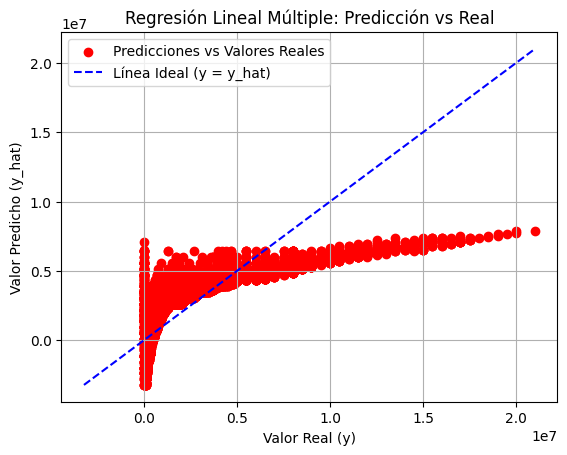

In [23]:
# Crear el gráfico de dispersión
plt.scatter(y, y_hat, color='red', label='Predicciones vs Valores Reales')

# Añadir la línea de referencia de "predicción perfecta"
min_val = min(y.min(), y_hat.min())
max_val = max(y.max(), y_hat.max())
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Línea Ideal (y = y_hat)')

# Etiquetas del gráfico
plt.xlabel('Valor Real (y)')
plt.ylabel('Valor Predicho (y_hat)')
plt.title('Regresión Lineal Múltiple: Predicción vs Real')

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.grid()
plt.show()

*i) Usando el método de mínimos cuadrados. Explica los indicadores obtenidos (como el
coeficiente de determinación y la correlación) y proporciona una breve interpretación de los
resultados*

In [24]:
# Calcular R²
ss_res = np.sum((y - y_hat) ** 2)  # Suma de los residuos al cuadrado
ss_tot = np.sum((y - y.mean()) ** 2)  # Suma total de los cuadrados
r2 = 1 - (ss_res / ss_tot)

print(f"Coeficiente de determinación (R²): {r2}")

corr_overall = np.corrcoef(x1, y)[0, 1]
corr_potential = np.corrcoef(x2, y)[0, 1]

print(f"Correlación entre overall y value_eur: {corr_overall}")
print(f"Correlación entre potential y value_eur: {corr_potential}")

Coeficiente de determinación (R²): 0.6264989112370201
Correlación entre overall y value_eur: 0.7541166954642996
Correlación entre potential y value_eur: 0.6222427759403106


Este análisis incluye el cálculo del coeficiente de determinación (R²) y las correlaciones entre las variables independientes (overall y potential) y la variable dependiente (value_eur).

El R² mide qué tan bien el modelo de regresión explica la variabilidad de la variable dependiente (value_eur). En este caso, un valor de 0.626 indica que aproximadamente el 62.6% de la variabilidad en el valor del jugador se explica por los atributos overall y potential. Esto sugiere que el modelo tiene una buena capacidad predictiva, aunque aún hay un 38.4% de la variabilidad que no es explicada por estos factores.

La correlación de 0.7541 indica una fuerte relación positiva entre la calificación overall del jugador y su valor en euros. A medida que overall aumenta, también lo hace el value_eur. Este resultado es esperable, ya que los jugadores con mejores habilidades generales tienden a ser más valiosos.

La correlación de 0.6222 entre potential y value_eur también es positiva, aunque ligeramente más débil que la de overall. Esto sugiere que los jugadores con un mayor potencial también tienden a tener un mayor valor, pero la relación no es tan fuerte como con overall. Esto puede reflejar que los equipos valoran más el rendimiento actual de un jugador (overall) que su potencial a futuro.

Tambien podemos determinar que estos dos valores en conjunto no tienen porque mejorar la capacidad de prediccion de estos modelos, esto nos hace pensar que para sacar el valor de forma mas exacta no solo es necesario sacar las 2 caracteristicas mas importantes sino que el conjunto y relacion de caracteristicas importantes con otras de menor relevancia son la que dan coherencia a los posibles valores de mercado.

*ii) Usando el método de descenso por gradiente. ¿Son los valores obtenidos iguales a los
conseguidos mediante la resolución del sistema de ecuaciones normales? Muestra los
resultados obtenidos junto con las últimas iteraciones del algoritmo. Indica los valores de los
parámetros utilizados (como tasa de aprendizaje y número de iteraciones).*

*iii) Da una interpretación del criterio de corte utilizado en el algoritmo del gradiente. Explica
si presenta alguna falla. Si no es una buena condición de corte, ¿puedes sugerir un criterio
alternativo más eficaz?*

## Parte 3: Comportamiento del método de descenso por gradiente

*c) Convergencia del método de descenso por gradiente. Explicar si el método siempre
converge al mínimo de la función. En caso contrario, proporciona un contraejemplo para
ilustrar este comportamiento.*